# Testing the camera

In this short notebook, we are going to test the camera. To see if it is correctly connected and the focus is ok.

With the machine assembeled:

- Place a small LEGO brick in front of the camera.
- Turn on the lights.

In [1]:
from picamera2 import Picamera2, Preview
import time

picam2 = Picamera2()
# using the default configuration for now
camera_config = picam2.create_preview_configuration()
picam2.configure(camera_config)

[2:08:04.359262416] [2836]  INFO Camera camera_manager.cpp:284 libcamera v0.2.0+46-075b54d5
[2:08:04.449953732] [2856]  WARN RPiSdn sdn.cpp:39 Using legacy SDN tuning - please consider moving SDN inside rpi.denoise
[2:08:04.455390303] [2856]  INFO RPI vc4.cpp:447 Registered camera /base/soc/i2c0mux/i2c@1/imx477@1a to Unicam device /dev/media2 and ISP device /dev/media0
[2:08:04.455502858] [2856]  INFO RPI pipeline_base.cpp:1144 Using configuration file '/usr/share/libcamera/pipeline/rpi/vc4/rpi_apps.yaml'
[2:08:04.461705109] [2836]  INFO Camera camera_manager.cpp:284 libcamera v0.2.0+46-075b54d5
[2:08:04.534472390] [2859]  WARN RPiSdn sdn.cpp:39 Using legacy SDN tuning - please consider moving SDN inside rpi.denoise
[2:08:04.539620038] [2859]  INFO RPI vc4.cpp:447 Registered camera /base/soc/i2c0mux/i2c@1/imx477@1a to Unicam device /dev/media2 and ISP device /dev/media0
[2:08:04.539730741] [2859]  INFO RPI pipeline_base.cpp:1144 Using configuration file '/usr/share/libcamera/pipeline/r

In [2]:
# Start the preview and camera
picam2.start_preview(Preview.NULL)
picam2.start()
time.sleep(2)

In [3]:
# Capture to a file
picam2.capture_file("test.jpg")

{'SensorTimestamp': 7693342874000,
 'ExposureTime': 34868,
 'ScalerCrop': (2, 0, 4052, 3040),
 'AnalogueGain': 4.0,
 'DigitalGain': 1.0006548166275024,
 'FrameDuration': 35217,
 'SensorBlackLevels': (4096, 4096, 4096, 4096),
 'Lux': 91.56047821044922,
 'SensorTemperature': 23.0,
 'AeLocked': True,
 'ColourGains': (3.372636079788208, 1.5706820487976074),
 'ColourTemperature': 5377,
 'FocusFoM': 847,
 'ColourCorrectionMatrix': (2.173170328140259,
  -0.9661121368408203,
  -0.20705442130565643,
  -0.3726109266281128,
  2.0587821006774902,
  -0.6861649751663208,
  -0.13346903026103973,
  -0.44054558873176575,
  1.574014663696289)}

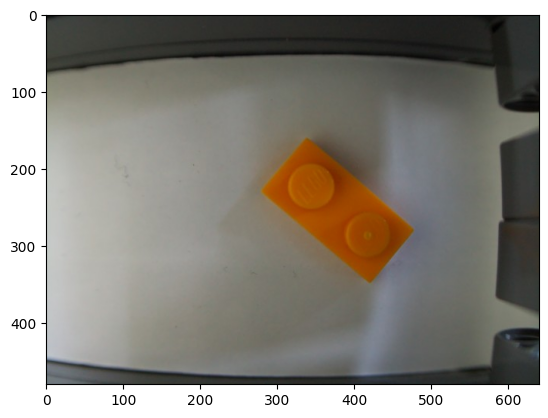

In [4]:
import cv2
from matplotlib import pyplot as plt

img=cv2.imread('test.jpg')
img_clr = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
plt.imshow(img_clr)

In [5]:
# Capture to an in-memory array
array = picam2.capture_array("main")

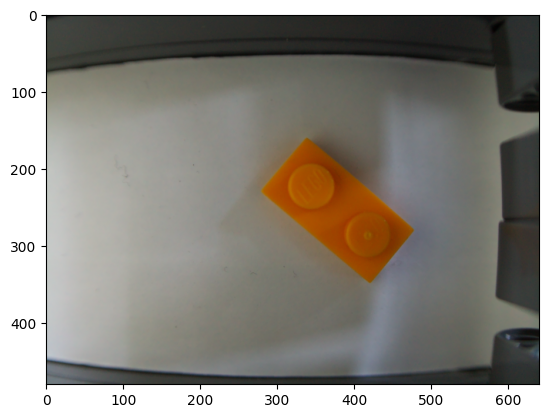

In [8]:
plt.imshow(array)

In [9]:
# Fully release the camera
picam2.stop()
picam2.stop_preview()
picam2.close()